In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import seaborn as sns


In [5]:
# loading the data from csv file to a pandas Dataframe
dataset = pd.read_csv('heart_disease_data.csv')
print(f"Dataset Size: {dataset.shape}")
dataset.head(10)



Dataset Size: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
# separating the data and labels
X = dataset.drop(columns = 'target', axis=1)
Y = dataset['target']
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
print(f"Train data: {X_train.shape}, Test data: {X_test.shape}\n\n")
print(f"Train: \n {Y_train.value_counts()}\n")
print(f"Test : \n {Y_test.value_counts()}")

Train data: (242, 13), Test data: (61, 13)


Train: 
 target
1    130
0    112
Name: count, dtype: int64

Test : 
 target
1    35
0    26
Name: count, dtype: int64


# **Decision Tree**

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4).fit(X_train, Y_train)


Model Training

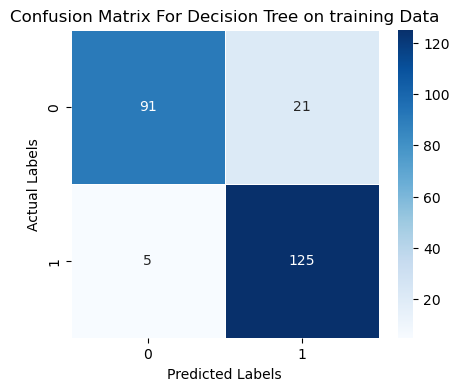

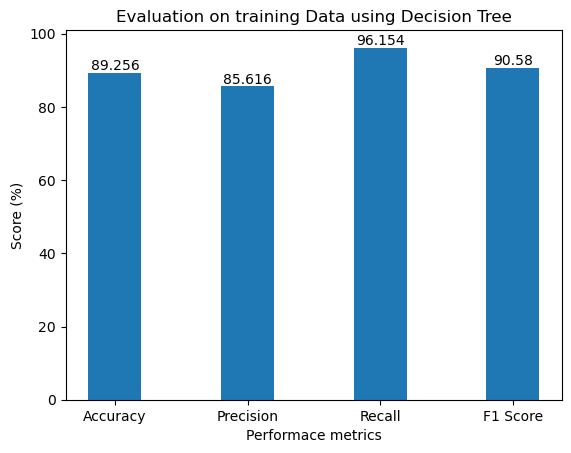

Accuracy: 89.256%
Precision: 85.616%
Recall: 96.154%
F1 Score: 90.58%


In [23]:
train_pred=dt.predict(X_train)

dt_a=round(accuracy_score(Y_train,train_pred),5)*100
dt_p=round(precision_score(Y_train,train_pred),5)*100
dt_r=round(recall_score(Y_train,train_pred),5)*100
dt_f1=round(f1_score(Y_train,train_pred),5)*100
cm = confusion_matrix(Y_train, train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For Decision Tree on training Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [dt_a, dt_p, dt_r,dt_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using Decision Tree")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {dt_a}%')
print(f'Precision: {dt_p}%')
print(f'Recall: {dt_r}%')
print(f'F1 Score: {dt_f1}%')

Model Testing

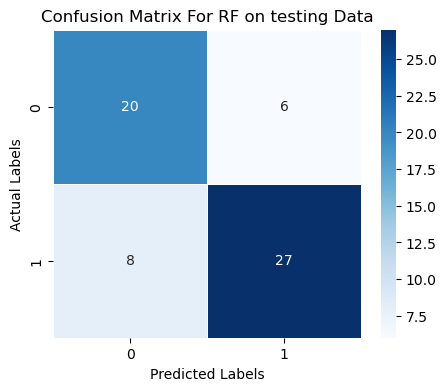

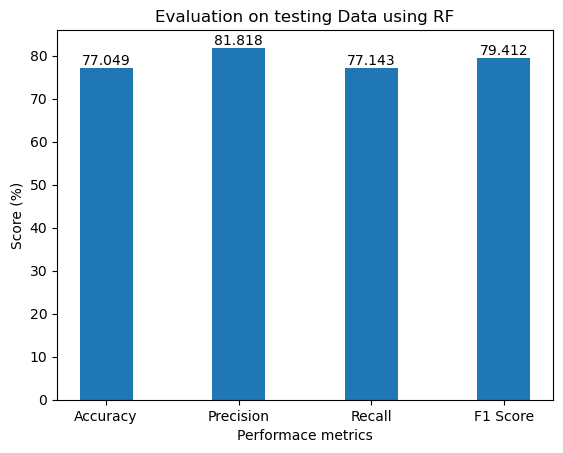

Accuracy: 77.049%
Precision: 81.818%
Recall: 77.143%
F1 Score: 79.412%


In [26]:
test_pred=dt.predict(X_test)


dt_a_t=round(accuracy_score(Y_test,test_pred),5)*100
dt_p_t=round(precision_score(Y_test,test_pred),5)*100
dt_r_t=round(recall_score(Y_test,test_pred),5)*100
dt_f1_t=round(f1_score(Y_test,test_pred),5)*100
cm = confusion_matrix(Y_test, test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For RF on testing Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [dt_a_t, dt_p_t, dt_r_t,dt_f1_t]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on testing Data using RF")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {dt_a_t}%')
print(f'Precision: {dt_p_t}%')
print(f'Recall: {dt_r_t}%')
print(f'F1 Score: {dt_f1_t}%')